# Oasis Infobyte

Task 2: Unemployement analysis using python.

Dataset : https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/Unemployment in India.csv')

# Check the first few rows of the dataset
print(data.head())


           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


Exploratory Data Analysis (EDA)**bold text**

In [10]:
# Summary statistics
print(data.describe())



        Estimated Unemployment Rate (%)   Estimated Employed  \
count                        740.000000         7.400000e+02   
mean                          11.787946         7.204460e+06   
std                           10.721298         8.087988e+06   
min                            0.000000         4.942000e+04   
25%                            4.657500         1.190404e+06   
50%                            8.350000         4.744178e+06   
75%                           15.887500         1.127549e+07   
max                           76.740000         4.577751e+07   

        Estimated Labour Participation Rate (%)  
count                                740.000000  
mean                                  42.630122  
std                                    8.111094  
min                                   13.330000  
25%                                   38.062500  
50%                                   41.160000  
75%                                   45.505000  
max                    

In [11]:
print(data.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

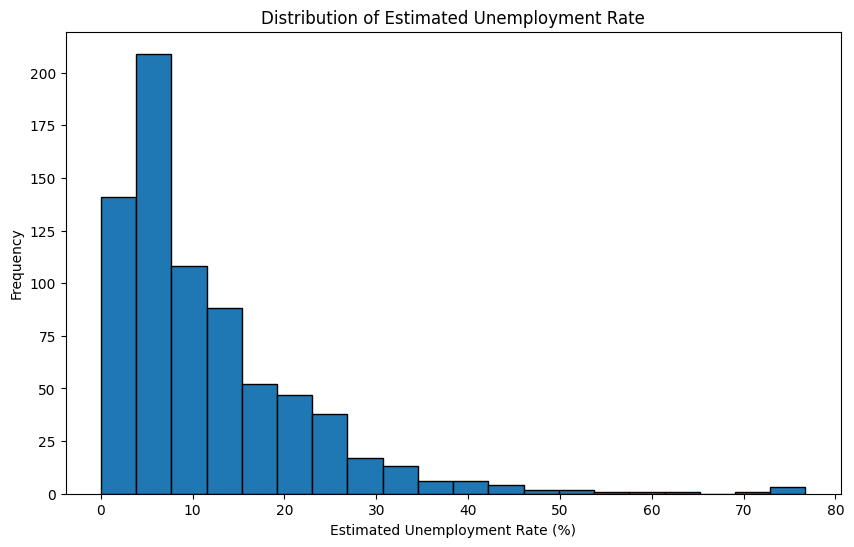

In [13]:
import matplotlib.pyplot as plt

# Histogram of Estimated Unemployment Rate (%)
plt.figure(figsize=(10, 6))
plt.hist(data[' Estimated Unemployment Rate (%)'], bins=20, edgecolor='black')
plt.title('Distribution of Estimated Unemployment Rate')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()


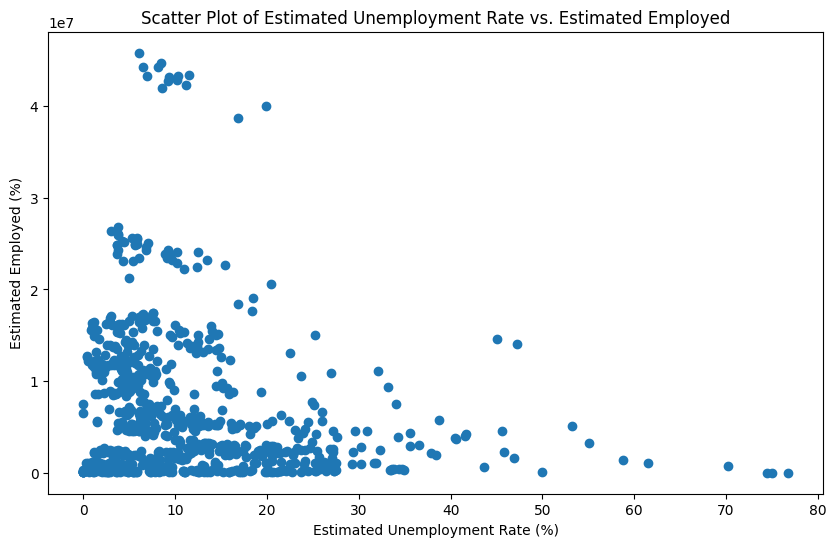

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your data into a DataFrame named 'data'
# Let's assume 'data' contains the following columns: ' Estimated Unemployment Rate (%)', ' Estimated Employed'

# Scatter plot of Estimated Unemployment Rate (%) vs. Estimated Employed
plt.figure(figsize=(10, 6))
plt.scatter(data[' Estimated Unemployment Rate (%)'], data[' Estimated Employed'])
plt.title('Scatter Plot of Estimated Unemployment Rate vs. Estimated Employed')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Estimated Employed (%)')
plt.show()


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [19]:
data.nunique()

Region                                       28
 Date                                        14
 Frequency                                    2
 Estimated Unemployment Rate (%)            624
 Estimated Employed                         740
 Estimated Labour Participation Rate (%)    626
Area                                          2
dtype: int64

**Predictions**

Number of missing values in each column:
Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64


<ipython-input-77-e997751cf990>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


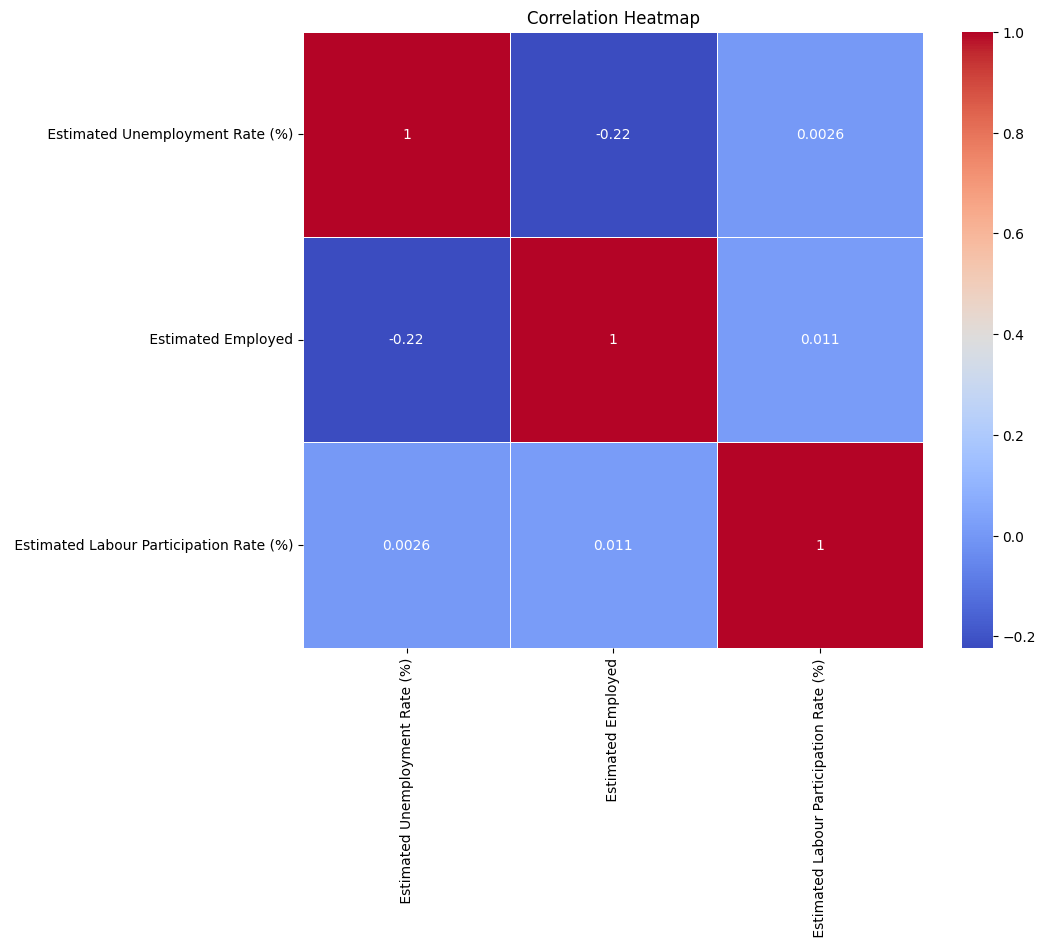

Correlation between Unemployment Rate and Employed: -0.22
Mean Squared Error: 139.08
R-squared: 0.04


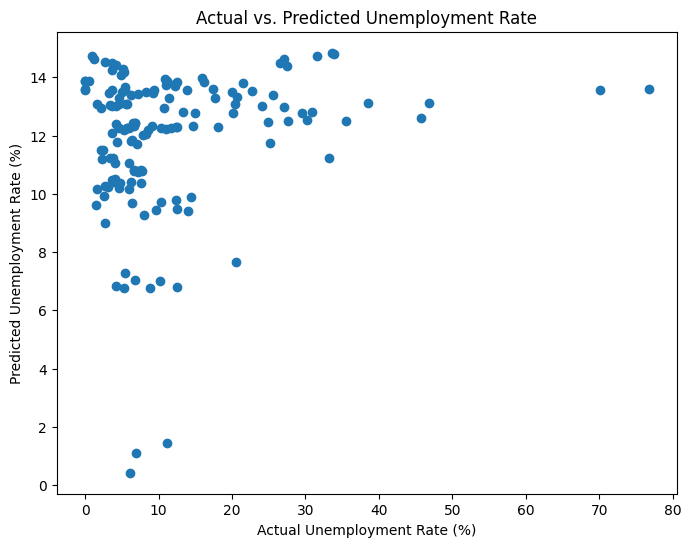

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

# Load your dataset (assuming it's already loaded into the 'data' DataFrame)
# If not, you can load it using: data = pd.read_csv('your_dataset.csv')

# Step 1: Data Preparation

# Check for missing values
print("Number of missing values in each column:")
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

# Step 2: Correlation Analysis

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Calculate the correlation between Estimated Unemployment Rate and Estimated Employed
corr_coefficient, _ = pearsonr(data[' Estimated Unemployment Rate (%)'], data[' Estimated Employed'])
print(f"Correlation between Unemployment Rate and Employed: {corr_coefficient:.2f}")

# Step 3: Regression Modeling

# Select the predictor (X) and target (y) variables
X = data[[' Estimated Employed', ' Estimated Labour Participation Rate (%)']]
y = data[' Estimated Unemployment Rate (%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model (you can use other metrics as well)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Step 4: Visualize the Regression

# Plot the predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Unemployment Rate (%)")
plt.ylabel("Predicted Unemployment Rate (%)")
plt.title("Actual vs. Predicted Unemployment Rate")
plt.show()


**Regression Analysis**

In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming 'X' is your feature matrix
# Assuming 'y' is your target variable with 768 samples
# Assuming 'test' is your testing data with 148 samples

# Ensure 'y' and 'test' have the same number of samples
y = y[:len(test)]

# Create and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(y.reshape(-1, 1), test)  # Reshape 'y' to match the shape of 'test'

# Now you can use the fitted model for predictions
predictions = linear_model.predict(y.reshape(-1, 1))


In [34]:
missing_values = data.isna().sum()
print(missing_values)


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [36]:
missing_values_y = y.isna().sum()
print(missing_values_y)


28


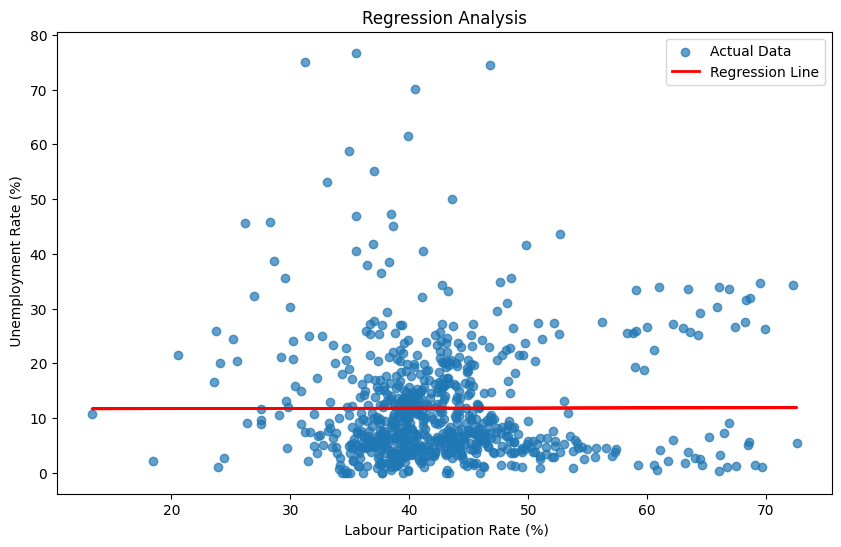

Intercept: 11.643807754072519
Coefficient: [0.00338113]


In [63]:
from sklearn.linear_model import LinearRegression

# Prepare the data
X = data[[' Estimated Labour Participation Rate (%)']]
y = data[' Estimated Unemployment Rate (%)']

# Initialize and fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Visualize the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Data', alpha=0.7)
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Regression Analysis')
plt.xlabel(' Labour Participation Rate (%)')
plt.ylabel(' Unemployment Rate (%)')
plt.legend()
plt.show()

# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)


**Advanced Forecasting**

In [96]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (assuming it's already loaded into the 'data' DataFrame)
# Replace 'your_data.csv' with the actual path to your dataset
data = pd.read_csv('/content/Unemployment in India.csv')

# Define the target variable
target = ' Estimated Employed'

# Drop rows with missing values in the target variable
data.dropna(subset=[target], inplace=True)

# Strip leading/trailing spaces from the ' Date' column and then preprocess
data[' Date'] = data[' Date'].str.strip()
data[' Date'] = pd.to_datetime(data[' Date'], format='%d-%m-%Y')
data['Year'] = data[' Date'].dt.year
data['Month'] = data[' Date'].dt.month
data.drop([' Date'], axis=1, inplace=True)  # Drop the original date column

# Encode categorical features if needed (e.g., using one-hot encoding)
data = pd.get_dummies(data, columns=['Region', ' Frequency', 'Area'], drop_first=True)

# Define the features (excluding the target variable)
features = [col for col in data.columns if col != target]

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Optionally, you can use the trained model for forecasting future values
# by providing the required input features.


Mean Squared Error (MSE): 1229869931678.23
R-squared (R2): 0.98
